In [ ]:
#ajio_data_analysis_using_python

In [1]:
#importing libraries
import pandas as pd


In [2]:
#to call csv files in python's dataframe
customers=pd.read_csv("customer.csv")
delivery=pd.read_csv("delivery.csv")
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")
ratings=pd.read_csv("ratings.csv")
returns=pd.read_csv("returns.csv")
transactions=pd.read_csv("transaction.csv")

In [3]:
#extracting the info
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   C_ID            10000 non-null  object
 1   C_Name          10000 non-null  object
 2   Gender          10000 non-null  object
 3   Age             10000 non-null  int64 
 4   City            10000 non-null  object
 5   State           10000 non-null  object
 6   Street_Address  10000 non-null  object
 7   Mobile          10000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


,Age,Mobile
count,10000.000000,1.000000e+04
mean,44.006400,9.503873e+09
std,15.325647,2.911932e+08
min,18.000000,9.000042e+09
25%,31.000000,9.250165e+09
50%,44.000000,9.507420e+09
75%,57.000000,9.756789e+09
max,70.000000,9.999973e+09


In [4]:
#check duplicates
orders.duplicated().sum()
products.duplicated().sum()

np.int64(0)

In [5]:
#first 5 data from dataset
delivery.head()

,DP_ID,DP_name,DP_Ratings,Percent_Cut
0,DV_61000001,Delhivery,5,25
1,DV_61000002,Ecom Express,4,20
2,DV_61000003,Blue Dart,4,25
3,DV_61000004,Xpressbees,4,20
4,DV_61000005,Shadowfax,3,15


In [6]:
#last 5 data from dataset
returns.tail()

,RT_ID,Or_ID,Reason,Return_Refund,Dates
1995,RR_301001996,OR_31007159,Late Delivery,Approved,2023-12-15
1996,RR_301001997,OR_31002005,Defective Product,Approved,2023-08-05
1997,RR_301001998,OR_31001976,Defective Product,Approved,2024-06-20
1998,RR_301001999,OR_31009400,Wrong Item Shipped,Approved,2024-09-21
1999,RR_301002000,OR_31005780,Defective Product,Rejected,2023-05-05


In [7]:
#joining tables
# for joining the tables we need to have a common header in both the table to perform the join.
# we are going to perfrom join operation on customer and order table.
customers.head(2)

,C_ID,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,CS_11000001,Manbir Lala,Male,67,Delhi,Delhi,"Park Ave, 163 , Delhi , Delhi - 529675",9607971039
1,CS_11000002,Radhika More,Female,51,Pune,Maharashtra,"Elm St, 960 , Pune , Maharashtra - 328062",9109249091


In [8]:
orders.head(2)

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25


In [9]:
merge_cust=pd.merge(right=customers,left=orders,how="inner",on="C_ID")
merge_cust

,Or_ID,C_ID,P_ID,Order_Date,Order_Time,Qty,Coupon,DP_ID,Discount,C_Name,Gender,Age,City,State,Street_Address,Mobile
0,OR_31000001,CS_11005317,PD_21001301,2024-02-27,22:02:00,1,No Coupon,DV_61000001,0,Balvan Mahajan,Male,67,Mumbai,Maharashtra,"Pine St, 193 , Mumbai , Maharashtra - 421437",9791758370
1,OR_31000002,CS_11000423,PD_21003593,2024-01-21,08:33:31,5,PULL,DV_61000002,25,Vincent Sinha,Female,59,Bengaluru,Karnataka,"2nd St, 70 , Bengaluru , Karnataka - 643723",9794196797
2,OR_31000003,CS_11001042,PD_21004315,2024-09-22,17:26:05,1,No Coupon,DV_61000002,0,Yagnesh Narang,Male,44,Delhi,Delhi,"3rd St, 771 , Delhi , Delhi - 234707",9047562688
3,OR_31000004,CS_11004079,PD_21007443,2023-05-26,03:15:48,10,AGREEMENT,DV_61000003,10,Jack Yadav,Female,57,Ghaziabad,Uttar Pradesh,"Main St, 626 , Ghaziabad , Uttar Pradesh - 215466",9002314381
4,OR_31000005,CS_11009894,PD_21007621,2023-10-26,04:02:44,7,WINDOW,DV_61000001,10,Raagini Sridhar,Male,28,Visakhapatnam,Andhra Pradesh,"Elm St, 760 , Visakhapatnam , Andhra Pradesh -...",9263883766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,OR_31009996,CS_11004842,PD_21004878,2024-11-14,18:20:50,5,MILLION,DV_61000005,15,Tanay Thaker,Female,58,Ghaziabad,Uttar Pradesh,"Pine St, 27 , Ghaziabad , Uttar Pradesh - 610729",9246855141
9996,OR_31009997,CS_11005966,PD_21000725,2023-05-15,03:02:18,4,No Coupon,DV_61000002,0,Hemang Nanda,Female,23,Thane,Maharashtra,"Park Ave, 720 , Thane , Maharashtra - 842045",9116830529
9997,OR_31009998,CS_11003081,PD_21002144,2024-12-28,17:50:17,6,No Coupon,DV_61000002,0,Pahal Guha,Male,56,Hyderabad,Telangana,"Pine St, 463 , Hyderabad , Telangana - 182547",9957248264
9998,OR_31009999,CS_11006873,PD_21005870,2024-07-15,20:24:29,6,EVERY,DV_61000005,20,Unni Saini,Female,52,Chennai,Tamil Nadu,"Oak St, 587 , Chennai , Tamil Nadu - 353497",9099364218


In [11]:
#Q.1 how many orders are placed in state (count of orders)?
state=merge_cust.groupby("State").agg({"Or_ID":"count"})# using groupby to summarize data i.e, it creates pivot table
state
state=state.sort_values(by=["Or_ID"],ascending=False)
state


,Or_ID
State,
Maharashtra,1994
Gujarat,1551
Uttar Pradesh,1487
Madhya Pradesh,977
Andhra Pradesh,554
Tamil Nadu,541
Telangana,513
Bihar,510
West Bengal,490


In [13]:
# Visualization
# importing libraries
import matplotlib.pyplot as plt
import seaborn  as sns

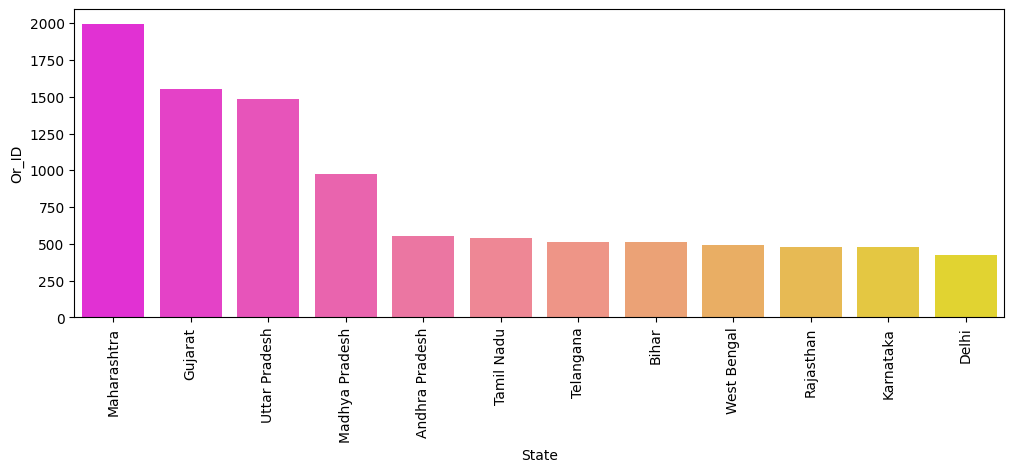

In [ ]:
#plotting graph using seaborn for the above query
plt.figure(figsize=(12,4))
sns.barplot(x=state.index,y="Or_ID",data=state,hue=state.index,palette="spring")
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Q.2 calculating quantity of each product?
# Merge returns with orders to get P_ID
returns_orders = pd.merge(returns, orders, on="Or_ID")
returns_by_product = returns_orders["P_ID"].value_counts()
returns_by_product.columns = ["P_ID", "Return_Count"]

In [ ]:
# Step 1: Get total orders by product
total_orders_by_product = orders["P_ID"].value_counts().reset_index()
total_orders_by_product.columns = ["P_ID", "Total_Orders"]

# Step 2: Merge with products to get product name
product_orders_with_names = pd.merge(total_orders_by_product, products[["P_ID", "P_Name"]], on="P_ID")

# Step 3: View result
product_orders_with_names.head(10)


,P_ID,Total_Orders,P_Name
0,PD_21003258,6,Pullover Fleece Maroon Embroidered Hoodie
1,PD_21005479,6,Single-Breasted Linen Navy Blue Checkered Blazer
2,PD_21003441,6,A-Line Polyester Dark Green Polka Dot Skirt
3,PD_21008237,6,V-Neck Jersey Navy Blue Solid T-Shirt
4,PD_21004389,6,Crew Neck Cotton White Striped Sweater
5,PD_21002819,6,Polo Linen Blue Floral Shirt
6,PD_21000872,6,Pleated Mesh Brown Colorblock Shorts
7,PD_21003606,6,Graphic Spandex Maroon Ribbed T-Shirt
8,PD_21002117,5,Tiered Chiffon Black Textured Skirt
9,PD_21004525,5,Oversized Polyester Black Solid Sweater


In [ ]:
#Q.3 How many orders are placed by each Age Group?
merged_demo = pd.merge(orders, customers, on='C_ID', how='inner')

In [ ]:
age_group = merged_demo.groupby("Age").agg({"Or_ID": "count"})  # Count orders per age group
age_group = age_group.sort_values(by="Or_ID", ascending=False)        # Sort descending
age_group.head()


,Or_ID
Age,
53,226
42,223
69,216
49,215
20,215


In [17]:
#Q4.Which cities have the highest number of unique customers?
city = customers.groupby("City").agg({"C_ID": "nunique"})           # Unique customers per city
city = city.sort_values(by="C_ID", ascending=False).head(10)         # Top 10 cities
city

,C_ID
City,
Vadodara,531
Surat,529
Jaipur,525
Kanpur,520
Patna,518
Chennai,517
Lucknow,512
Hyderabad,512
Ahmedabad,511


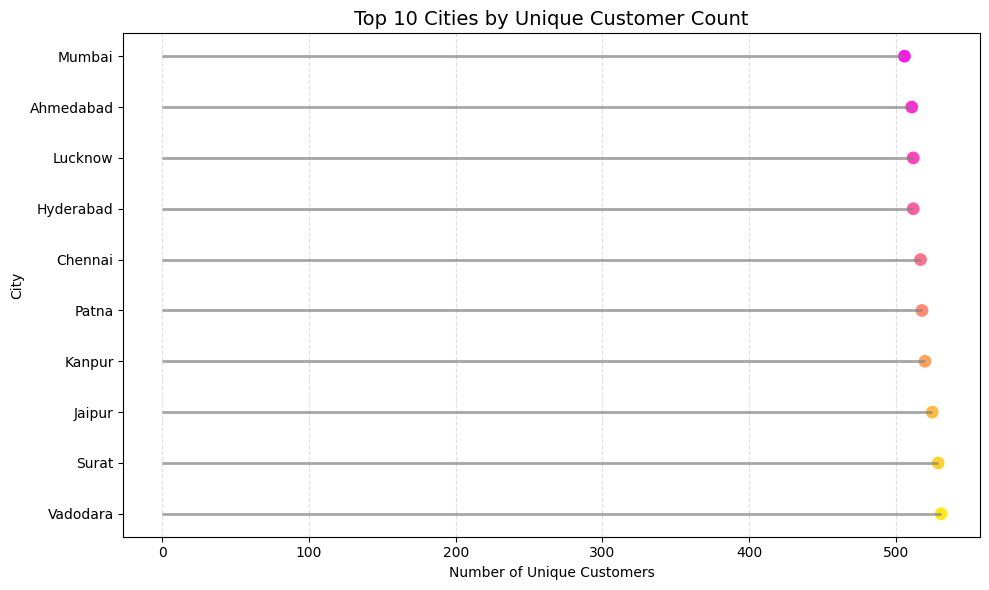

In [23]:
# Assuming your DataFrame is named 'city' with columns "City" and "C_ID"
city_sorted = city.sort_values("C_ID", ascending=True)

plt.figure(figsize=(10, 6))
plt.hlines(y=city_sorted["City"], xmin=0, xmax=city_sorted["C_ID"], color="gray", alpha=0.7, linewidth=2)
sns.scatterplot(
    x=city_sorted["C_ID"],
    y=city_sorted["City"],
    hue=city_sorted["City"],
    palette="spring",
    s=100,
    legend=False
)

plt.title("Top 10 Cities by Unique Customer Count", fontsize=14)
plt.xlabel("Number of Unique Customers")
plt.ylabel("City")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [26]:
pip install plotly

In [29]:
#Q.5 What is the most used payment mode?
payment_mode_usage = transactions['Transaction_Mode'].value_counts().reset_index()
payment_mode_usage.columns = ['Transaction_Mode', 'Transaction_Count']
payment_mode_usage


,Transaction_Mode,Transaction_Count
0,Net Banking,2057
1,Debit Card,2011
2,Credit Card,1980
3,UPI,1978
4,Wallet,1974


In [30]:
import plotly.graph_objects as go
payment_mode_usage = transactions['Transaction_Mode'].value_counts().reset_index()
payment_mode_usage.columns = ['Transaction_Mode', 'Transaction_Count']
payment_mode_usage

# Custom spring-like pastel colors
spring_colors = ['#FFB6C1', '#FFC0CB', '#FFDAB9', '#E0FFFF', '#98FB98', '#D8BFD8']

fig = go.Figure(
    data=[go.Pie(
        labels=payment_mode_usage["Transaction_Mode"],
        values=payment_mode_usage["Transaction_Count"],
        hole=0.3,
        pull=[0.05] * len(payment_mode_usage),
        marker=dict(colors=spring_colors[:len(payment_mode_usage)])
    )]
)

fig.update_traces(textinfo='percent+label')
fig.update_layout(
    title_text="3D-Style Pie Chart of Payment Modes (Spring Theme)",
    showlegend=True
)

fig.show()

In [ ]:
#Q.6 How many transactions rewarded with loyalty points?
reward_usage = transactions['Reward'].value_counts().reset_index()
reward_usage.columns = ['Reward_Status', 'Count']
reward_usage

,Reward_Status,Count
0,No,5024
1,Yes,4976


In [ ]:
#Q.7 How much Revenue is Generated by Each Category
# Step 1: Join the orders and products tables on P_ID
orders_products = pd.merge(orders, products, on="P_ID", how="inner")

# Step 2: Create a Revenue column (Revenue = Qty * Price)
orders_products["Revenue"] = orders_products["Qty"] * orders_products["Price"]

# Step 3: Group by Category and sum the revenue
revenue_per_category = (
    orders_products.groupby("Category")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Display the result
print(revenue_per_category)

  Category   Revenue
0   Blazer  10869548
1    Skirt  10566102
2    Jeans  10139129
3   Shorts  10033582
4    Shirt   9779816
5   Jacket   9727921
6  T-Shirt   9699619
7    Dress   9071308
8  Sweater   8950999
9   Hoodie   8489054


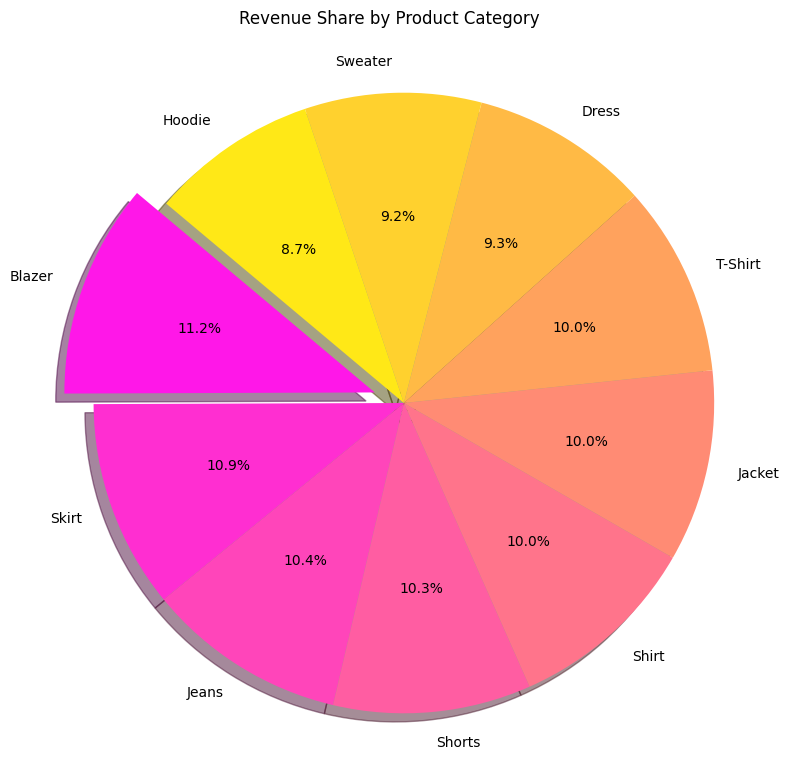

In [ ]:
labels = revenue_per_category["Category"]
sizes = revenue_per_category["Revenue"]

# Optional: explode largest slice for emphasis
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140, colors=sns.color_palette("spring", len(labels)))
plt.title("Revenue Share by Product Category")
plt.axis("equal")  # Equal aspect ratio ensures a circular pie
plt.tight_layout()
plt.show()

In [ ]:
#Q.8 Return Rate by Category ?
# Join orders with returns on Or_ID
orders_returns = pd.merge(orders, returns, on="Or_ID", how="left")

# Join result with products on P_ID
orders_returns_products = pd.merge(orders_returns, products, on="P_ID", how="inner")

# Calculate total orders per category
total_orders = orders_returns_products.groupby("Category")["Or_ID"].count()

# Calculate approved returns per category
returned_orders = (
    orders_returns_products[orders_returns_products["Return_Refund"] == "Approved"]
    .groupby("Category")["Or_ID"]
    .count()
)

# Calculate return rate (%)
return_rate = ((returned_orders / total_orders) * 100).fillna(0).reset_index()
return_rate.columns = ["Category", "Return_Rate (%)"]
return_rate = return_rate.sort_values(by="Return_Rate (%)", ascending=False)

# View result
print(return_rate)

  Category  Return_Rate (%)
5    Shirt        11.758989
8  Sweater        10.473313
7    Skirt         9.593023
2   Hoodie         9.565217
0   Blazer         9.515260
9  T-Shirt         9.290709
6   Shorts         9.211776
1    Dress         9.015544
3   Jacket         8.884501
4    Jeans         7.924528


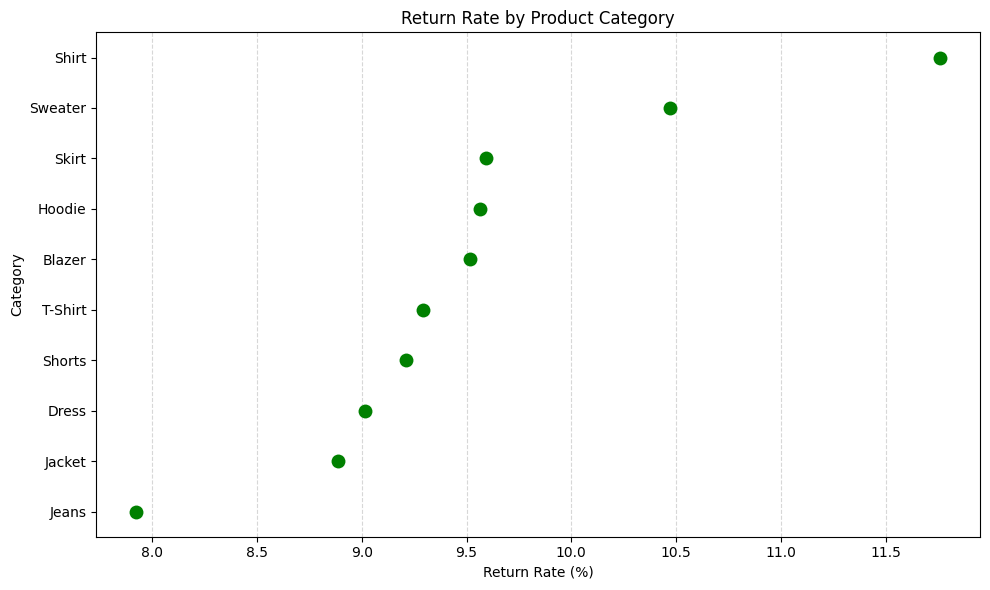

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=return_rate, x="Return_Rate (%)", y="Category", size=10, color='green')
plt.title("Return Rate by Product Category")
plt.xlabel("Return Rate (%)")
plt.ylabel("Category")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
